In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [2]:
# Load Fashine MNIST
(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

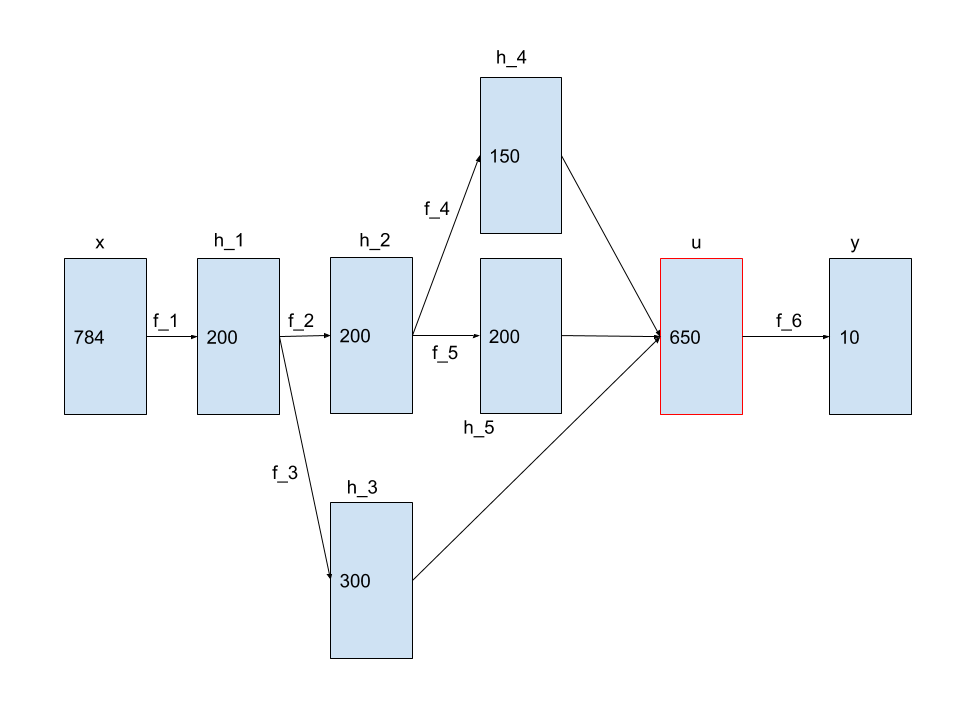

In [24]:
from IPython.display import Image
Image(filename="image.png")

In [18]:
x = Input(shape=(784,))
f_1 = Dense(200, activation='relu')
f_2 = Dense(200, activation='relu')
f_3 = Dense(300, activation='sigmoid')
f_4 = Dense(150, activation='relu')
f_5= Dense(200, activation='sigmoid')
f_6= Dense(10, activation='softmax')

In [19]:
h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_1)
h_4 = f_4(h_2)
h_5 = f_5(h_2)
u = concatenate([h_3, h_4, h_5])
y = f_6(u)

In [20]:
model = Model(x, y)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 200)          157000      input_3[0][0]                    
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 200)          40200       dense_13[0][0]                   
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 300)          60300       dense_13[0][0]                   
____________________________________________________________________________________________

In [21]:
model.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, batch_size=256, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0288 - accuracy: 0.7967
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0205 - accuracy: 0.8594
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0186 - accuracy: 0.8712
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0169 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0164 - accuracy: 0.8882
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0155 - accuracy: 0.8948
Epoch 7/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0148 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0144 - accuracy: 0.9032
Epoch 9/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0139 - accuracy: 0.9056
Epoch 10/10
60

In [23]:
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 2s 40us/sample - loss: 0.0131 - accuracy: 0.9122
Loss: 0.013124245995034775
準確率: 91.21833443641663
